In [16]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [17]:
# constant nodes 
const_1 = tf.constant(value=[5.0], 
                      dtype=tf.float32, # optional
                      shape=(1,), 
                      name='const_1') # optional # true by default
print(const_1)

Tensor("const_1:0", shape=(1,), dtype=float32)


In [26]:
# variable nodes

var_1 = tf.Variable(initial_value=1.0, 
                   trainable=True,
                   validate_shape=True,
                   caching_device=None,
                   name='var_1',
                   variable_def=None,
                   dtype=tf.float32,
                   import_scope=None)

print(var_1)

<tf.Variable 'var_1_1:0' shape=() dtype=float32_ref>


In [21]:
placeholder_1 = tf.placeholder(dtype=tf.float32,
                              shape=(1,),
                              name='placeholder_1')
print(placeholder_1)

Tensor("placeholder_1:0", shape=(1,), dtype=float32)


## Tensorflow Sessions & Graphs

In [23]:
session = tf.Session()
print(session.run(const_1))

array([5.], dtype=float32)

In [27]:
init = tf.global_variables_initializer()
session.run(init)
print(session.run(var_1))

1.0


In [28]:
print(session.run([const_1, var_1]))

[array([5.], dtype=float32), 1.0]


In [30]:
print(session.run(placeholder_1, feed_dict={placeholder_1: [11.6]}))

[11.6]


## Tensoflow Operations

In [33]:
result = const_1 + 5 
session.run(result)

array([10.], dtype=float32)

In [34]:
# shows a tensor
result = tf.add(const_1, 5, name='add_node')
print(result)

Tensor("add_node:0", shape=(1,), dtype=float32)


In [37]:
result = placeholder_1 + 10 
print(session.run(result, feed_dict={placeholder_1: [10]}))

[20.]


## Linear Regression 

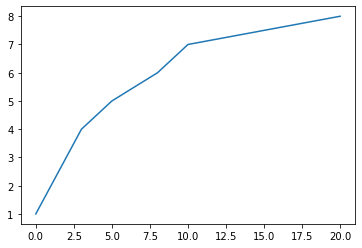

In [55]:
import matplotlib.pyplot as plt 

X_train = [0.0, 1.0, 2.0, 3.0, 5, 8, 10, 20]
y_train = [1, 2, 3, 4, 5, 6, 7, 8]

plt.plot(X_train, y_train)
plt.show()

In [56]:
# y = m(x) + b 

m = tf.Variable(initial_value=[0.5], dtype=tf.float32) # slope
b = tf.Variable(initial_value=[0.5], dtype=tf.float32) # y intercept

In [57]:
x_input = tf.placeholder(dtype=tf.float32)
y_input = tf.placeholder(dtype=tf.float32)

In [58]:
y_output = tf.add(tf.multiply(m, x_input), b)

In [59]:
## training our model
loss = tf.reduce_sum(input_tensor=tf.square(x=y_output - y_input))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train_step = optimizer.minimize(loss=loss)

In [60]:
session = tf.Session()
session.run(tf.global_variables_initializer())
# epoch is num of times to run through our dataset 
print(session.run(train_step, feed_dict={x_input:X_train, y_input:y_train}))
for _ in range(1000):
    session.run(train_step, feed_dict={x_input:X_train, y_input:y_train})
    
print(session.run([loss, m, b], feed_dict={x_input:X_train, y_input:y_train}))


None
[nan, array([nan], dtype=float32), array([nan], dtype=float32)]


In [61]:
# model predictions 
model_output = session.run(y_output, feed_dict={x_input: X_train})

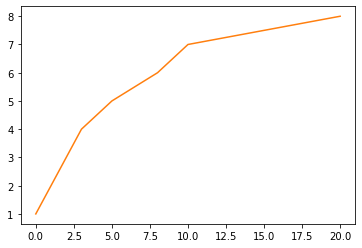

In [62]:
plt.plot(X_train, model_output)
plt.plot(X_train, y_train)
plt.show()